In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as mplt #plotting
import numpy as np # linear algebra
import sklearn.preprocessing as sklearn
import mpl_toolkits.mplot3d as Axes3D
import seaborn as sns
import tensorflow as tensorflow
from tensorflow import keras
import os # accessing directory structure

In [2]:
#Read CSV files.
sales_data=pd.read_csv('/content/Retail Data Analytics/sales data-set.csv')
store_data=pd.read_csv('/content/Retail Data Analytics/stores data-set.csv')
features_data=pd.read_csv('/content/Retail Data Analytics/Features data set.csv')

In [3]:
#Print first 5 rows from Sales Data
print(sales_data.head(5))

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False


In [4]:
#Print first 5 rows from Store Data
print(store_data.head(5))

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [5]:
#Print first 5 rows from features data
print(features_data.head(5))

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [6]:
nRow, nCol=features_data.shape
print("the features_data have", nRow, "Rows and" , nCol, "Columns")

the features_data have 8190 Rows and 12 Columns


In [7]:
nRow, nCol=store_data.shape
print("the store_data have", nRow, "Rows and" , nCol, "Columns")

the store_data have 45 Rows and 3 Columns


In [8]:
nRow, nCol=sales_data.shape
print("the sales_data have", nRow, "Rows and" , nCol, "Columns")

the sales_data have 421570 Rows and 5 Columns


In [9]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
features_data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [12]:
sales_data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [13]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [14]:
store_data.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [15]:
#Changing date format
features_data['Date']=pd.to_datetime(features_data['Date'], format='mixed')
sales_data['Date']=pd.to_datetime(sales_data['Date'], format='mixed')

In [16]:
#Merge two datasets
#Merge sales, and features datasets
sales_feature_df=pd.merge(sales_data, features_data, how='left', on=['Store', 'Date', 'IsHoliday'])
#merge new (sales_feature_df) dataset with store dataset
sales_store_feature_df=pd.merge(sales_feature_df, store_data, how='left', on='Store')

In [17]:
sales_feature_df.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421567,45,98,2012-12-10,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


In [18]:
sales_store_feature_df.head(5)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [19]:
sales_store_feature_df.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570,421570.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN
freq,NaN,NaN,NaN,NaN,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215478,NaN
mean,22.200546,44.260317,2011-06-19 05:35:51.733757184,15981.258123,NaN,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,NaN,136727.915739
min,1.000000,1.000000,2010-01-10 00:00:00,-4988.940000,NaN,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,NaN,34875.000000
25%,11.000000,18.000000,2010-10-12 00:00:00,2079.650000,NaN,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,NaN,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,NaN,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,NaN,140167.000000
75%,33.000000,74.000000,2012-03-02 00:00:00,20205.852500,NaN,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,NaN,202505.000000
max,45.000000,99.000000,2012-12-10 00:00:00,693099.360000,NaN,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,NaN,219622.000000


In [20]:
sales_store_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [21]:
#Check Dataset for all null values
sales_store_feature_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [22]:
#Seperate Numerical and Categorical variables.
cat_col=['Store', 'Dept', 'IsHoliday', 'Type']
num_col=sales_store_feature_df.columns.drop(cat_col) #Drop categorical columns
num_col=num_col.drop('Date') #Drop Date columns

print('Categorical Variables')
print(cat_col)

print('Numarical Variables')
print(num_col)

Categorical Variables
['Store', 'Dept', 'IsHoliday', 'Type']
Numarical Variables
Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size'],
      dtype='object')


In [23]:
#Graphical insights

#Across time: Weekly sales across time, (per month and per year), Unemployment across time, CPI across time, Fuel_Price across time, Temperature Across time
#Across outlets: Weekly sales per store, type, department
#Factors that affects sales

In [25]:
#Graphical insights across time.

<function matplotlib.pyplot.show(close=None, block=None)>

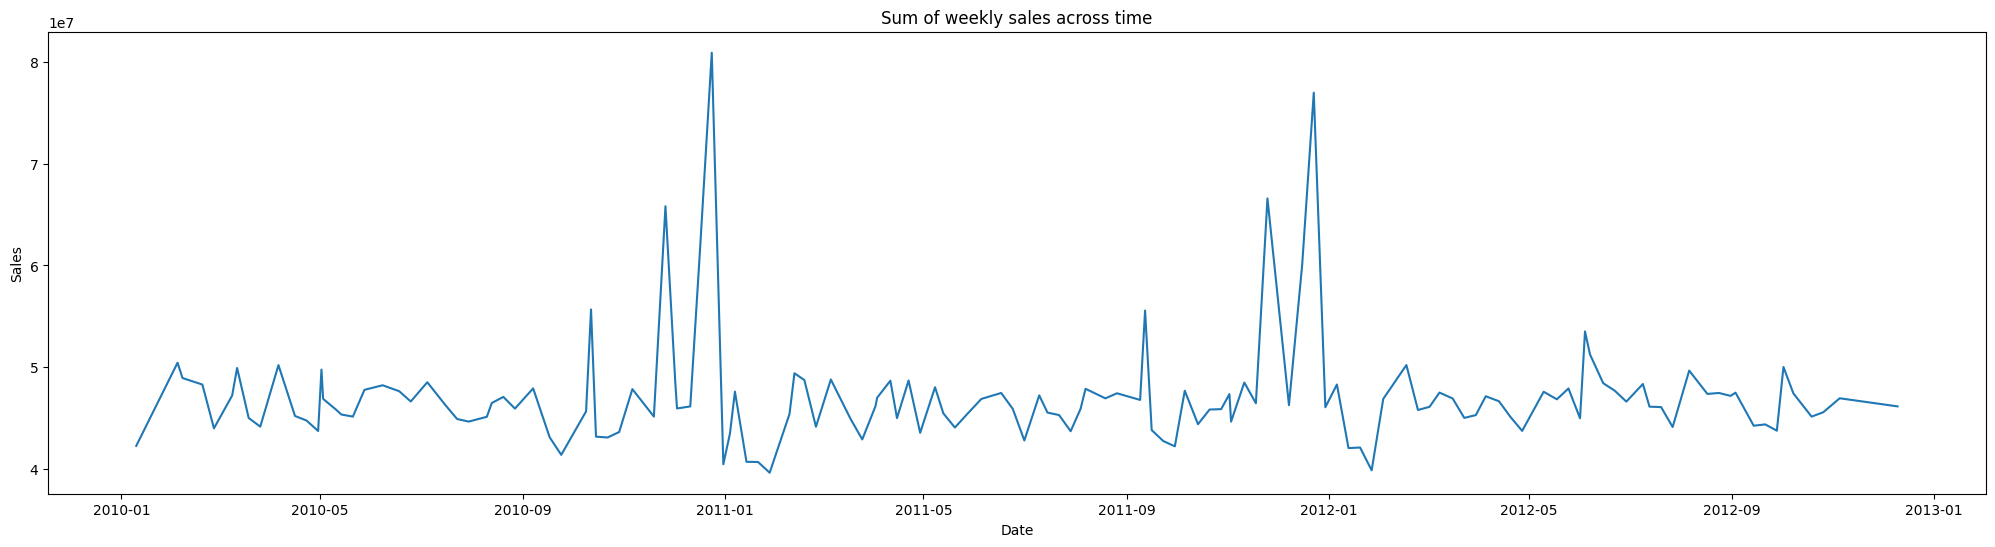

In [24]:
#What is the trend in weekly sales across time - per year, per month

#Sum of sales across time.

sales_across_time=sales_store_feature_df.groupby(by =['Date'], as_index=False)['Weekly_Sales'].sum()

mplt.figure(figsize=(25, 6))
mplt.plot(sales_across_time.Date, sales_across_time.Weekly_Sales)
mplt.title("Sum of weekly sales across time")
mplt.xlabel("Date")
mplt.ylabel("Sales")
mplt.show

<ipython-input-26-cde1ce670f70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='viridis' )


Text(0, 0.5, 'Sum of weekly sales (millions)')

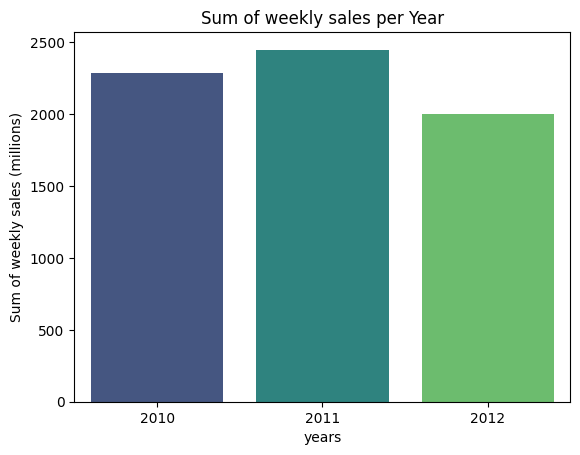

In [26]:
#sum of Yearly sales

yearly_sales=sales_store_feature_df.groupby(sales_store_feature_df.Date.dt.year)['Weekly_Sales'].sum()/1000000
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='viridis' )
mplt.title("Sum of weekly sales per Year")
mplt.xlabel("years")
mplt.ylabel("Sum of weekly sales (millions)")

<ipython-input-27-da5441be0cff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='cividis' )


Text(0, 0.5, 'Sum of weekly sales (millions)')

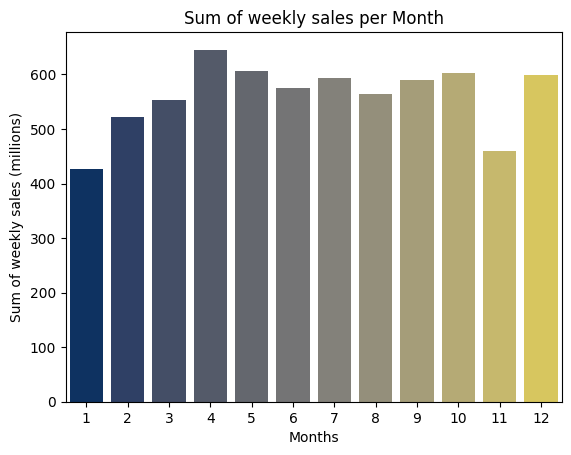

In [27]:
# Sum of Monthly Sales

yearly_sales=sales_store_feature_df.groupby(sales_store_feature_df.Date.dt.month)['Weekly_Sales'].sum()/1000000
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='cividis' )
mplt.title("Sum of weekly sales per Month")
mplt.xlabel("Months")
mplt.ylabel("Sum of weekly sales (millions)")

In [28]:
# Top 5 dates where weekly_sales are the highest

sort_sales_acorss_time = sales_across_time.sort_values('Weekly_Sales', ascending=False) #Sorting in decensing order
sort_sales_acorss_time.head(5)

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [29]:
#What is the trend in average unemployment rate across time

<function matplotlib.pyplot.show(close=None, block=None)>

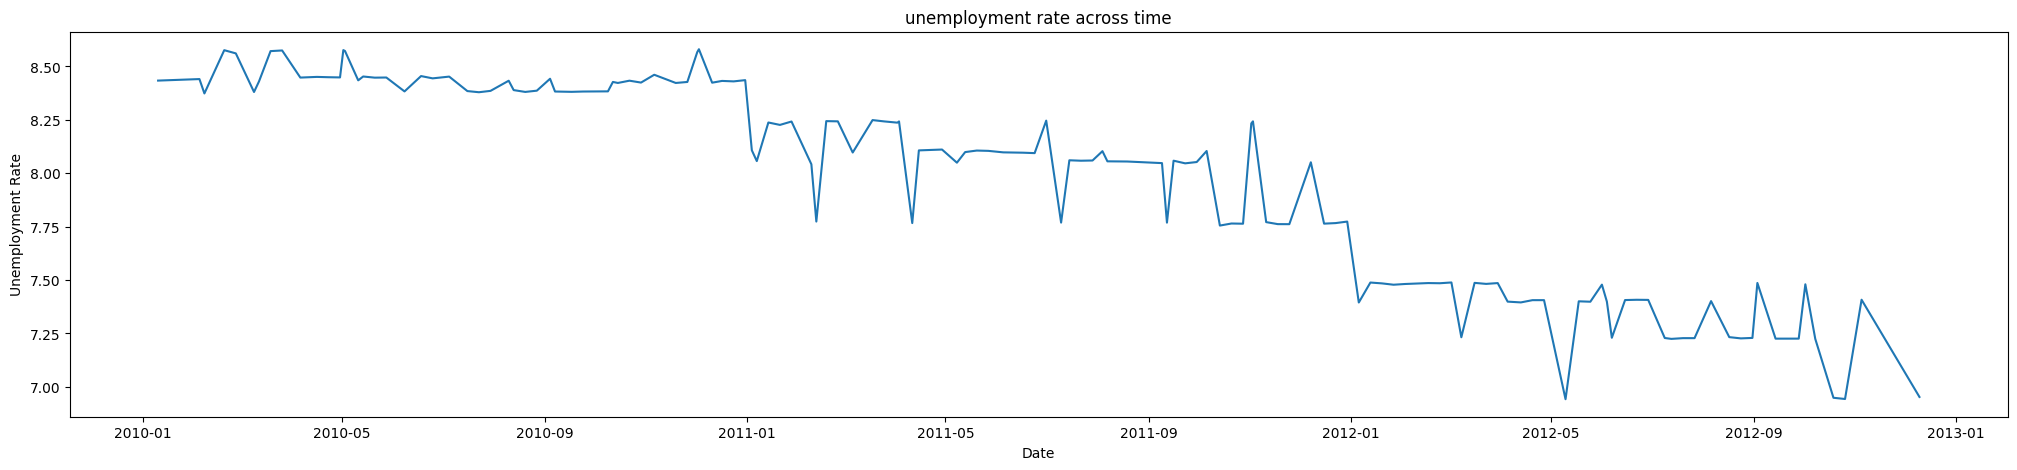

In [30]:
#unemployment rate across time

unemployment_across_time=sales_store_feature_df.groupby(by=['Date'], as_index= False)['Unemployment'].mean()
mplt.figure(figsize=(25, 5))
mplt.plot(unemployment_across_time.Date, unemployment_across_time.Unemployment)
mplt.title("unemployment rate across time")
mplt.xlabel("Date")
mplt.ylabel("Unemployment Rate")
mplt.show

In [31]:
# What is the trend in average CPI across time

<function matplotlib.pyplot.show(close=None, block=None)>

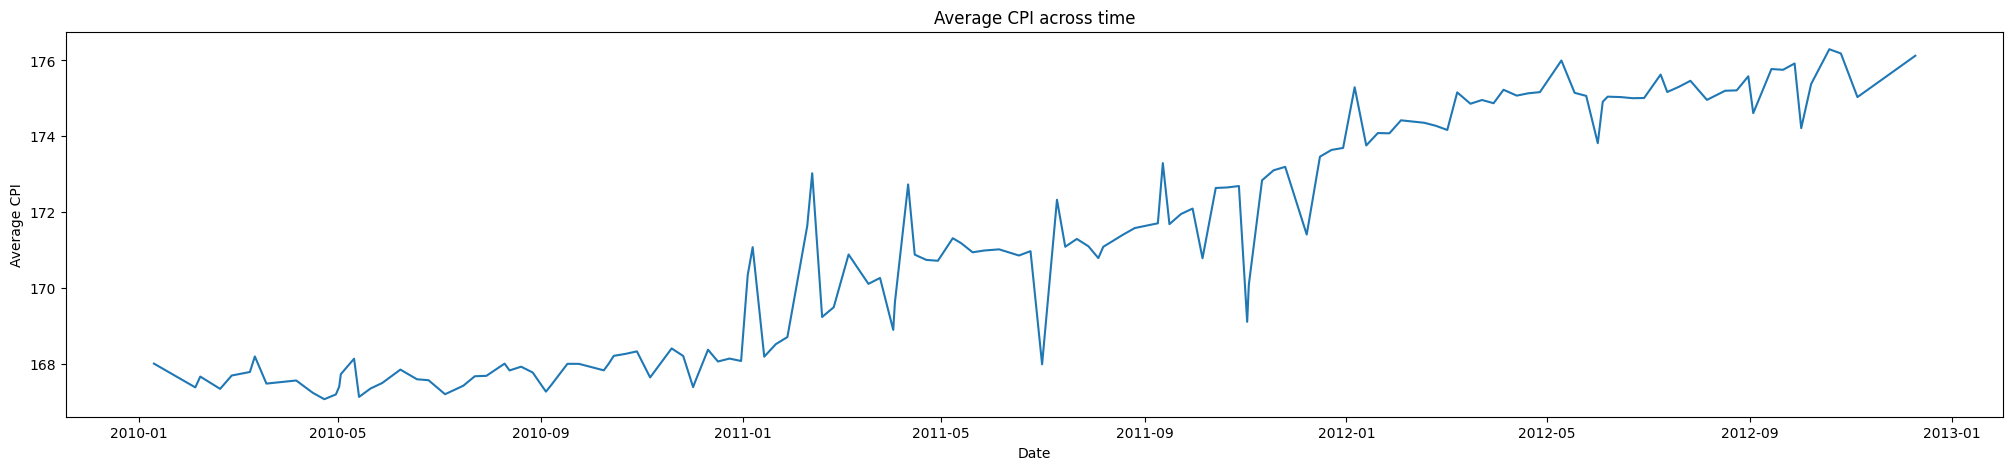

In [32]:
#CPI across time

cpi_across_time=sales_store_feature_df.groupby(by =['Date'], as_index=False)['CPI'].mean()
mplt.figure(figsize=(25, 5))
mplt.plot(cpi_across_time.Date, cpi_across_time.CPI)
mplt.title("Average CPI across time")
mplt.xlabel("Date")
mplt.ylabel("Average CPI")
mplt.show


In [33]:
#What is the trend in average Fuel price, Temperature across time

<function matplotlib.pyplot.show(close=None, block=None)>

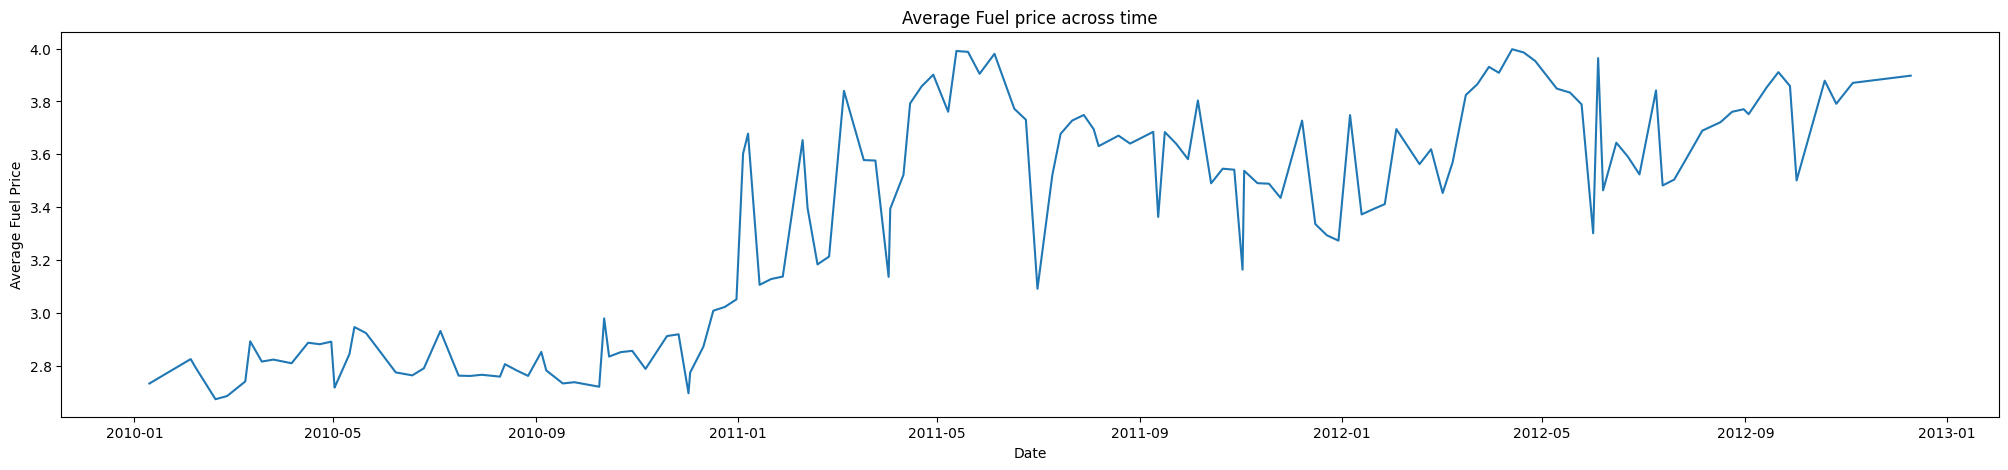

In [34]:
#Average Fuel price across time

fuel_across_time=sales_store_feature_df.groupby(by=['Date'], as_index=False)['Fuel_Price'].mean()
#print(fuel_across_time)
mplt.figure(figsize=(25,5))
mplt.plot(fuel_across_time.Date, fuel_across_time.Fuel_Price)
mplt.title("Average Fuel price across time")
mplt.xlabel("Date")
mplt.ylabel("Average Fuel Price")
mplt.show

<function matplotlib.pyplot.show(close=None, block=None)>

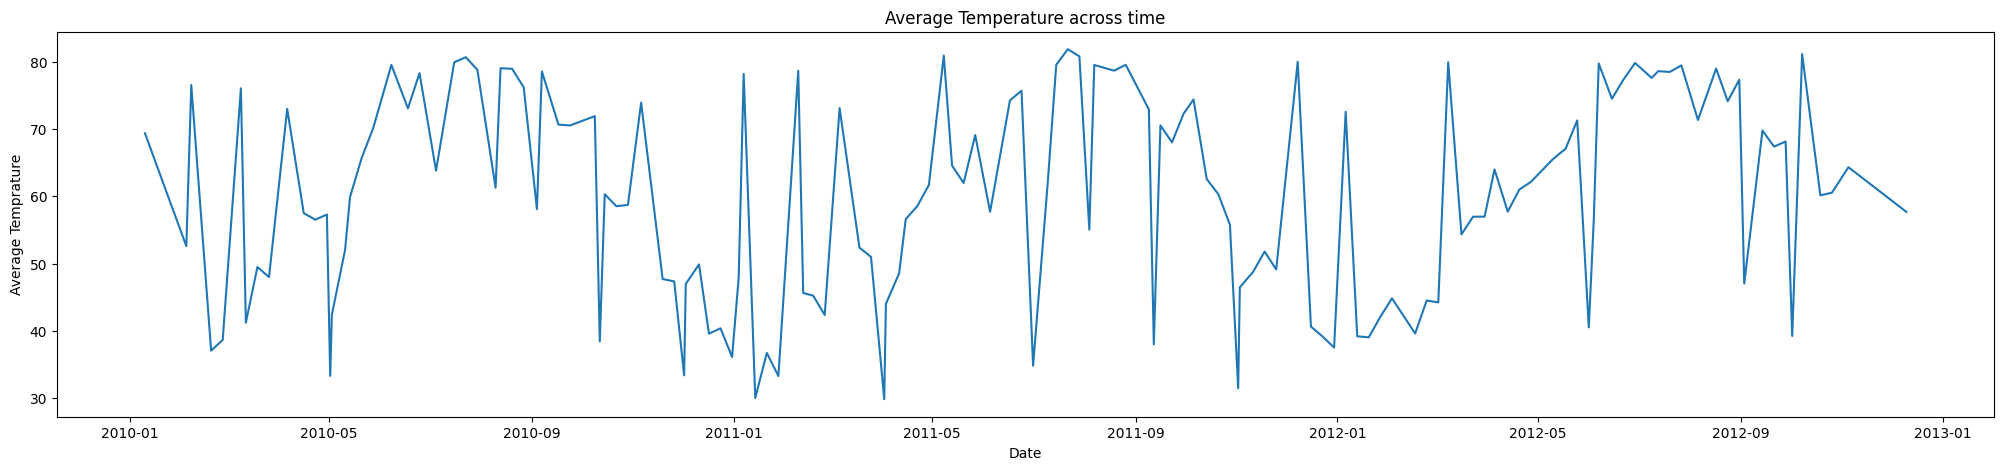

In [35]:
#Average Temperature across time

tempratures_across_time=sales_store_feature_df.groupby(by= ['Date'], as_index=False)['Temperature'].mean()
mplt.figure(figsize=(25, 5))
mplt.plot(tempratures_across_time.Date, tempratures_across_time.Temperature)
mplt.title("Average Temperature across time")
mplt.xlabel("Date")
mplt.ylabel("Average Temprature")
mplt.show

<ipython-input-36-ad4551c1cc8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stores_sales.Store, y=stores_sales.Weekly_Sales, data=stores_sales, palette='flare')


<function matplotlib.pyplot.show(close=None, block=None)>

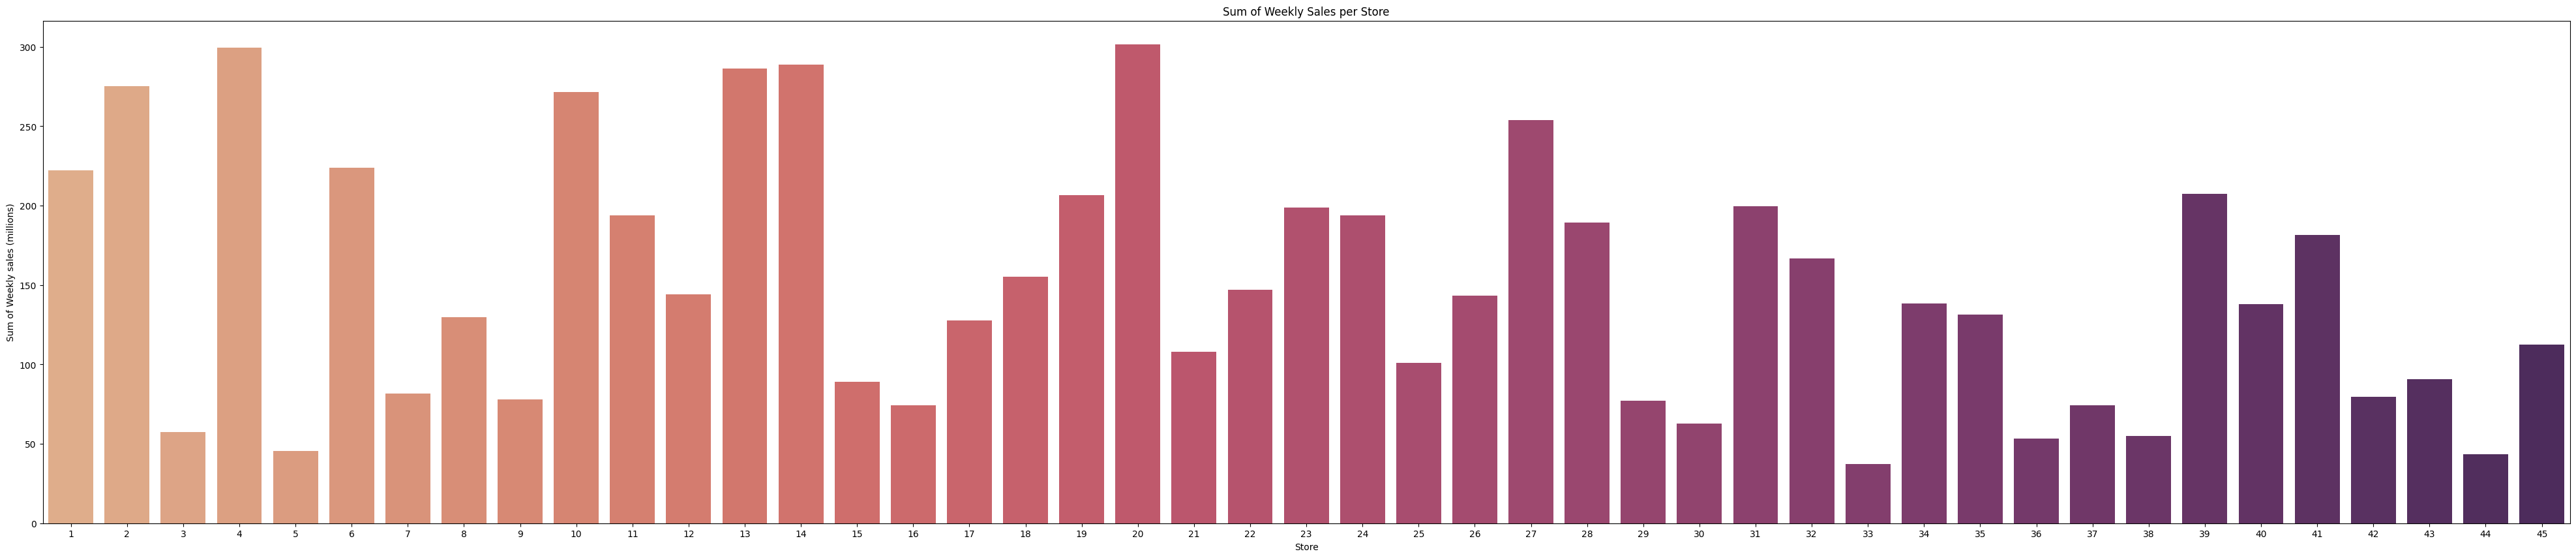

In [36]:
# Which stores are the highest earners?

stores_sales=sales_store_feature_df.groupby(by= ['Store'], as_index=False)['Weekly_Sales'].sum()
stores_sales['Weekly_Sales']=stores_sales['Weekly_Sales']/1000000
mplt.figure(figsize=(50,10))
sns.barplot(x=stores_sales.Store, y=stores_sales.Weekly_Sales, data=stores_sales, palette='flare')
mplt.title("Sum of Weekly Sales per Store")
mplt.xlabel("Store")
mplt.ylabel("Sum of Weekly sales (millions)")
mplt.show

<ipython-input-37-42081697c57e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_sales.Type, y=type_sales.Weekly_Sales, data=type_sales, palette= 'crest')


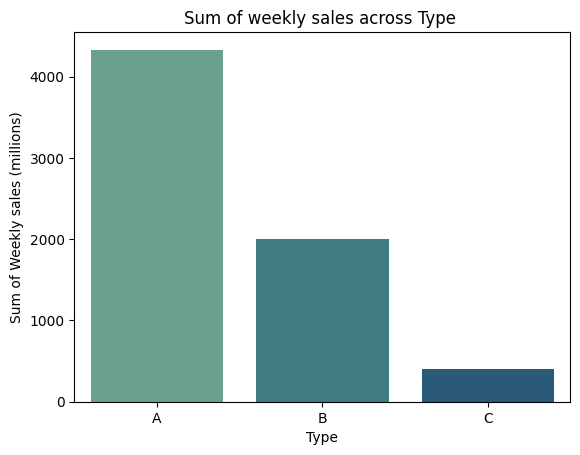

In [37]:
# Which type of store is the highest earner?
# Sum of weekly sales across Type

type_sales=sales_store_feature_df.groupby(by= ['Type'], as_index=False)['Weekly_Sales'].sum()
type_sales['Weekly_Sales']=type_sales['Weekly_Sales']/1000000
#mplt.figure(figsize=(25, 5))
sns.barplot(x=type_sales.Type, y=type_sales.Weekly_Sales, data=type_sales, palette= 'crest')
mplt.title("Sum of weekly sales across Type ")
mplt.xlabel("Type")
mplt.ylabel("Sum of Weekly sales (millions)")
mplt.show()

Text(0, 0.5, 'Sum of Weekly sales (millions)')

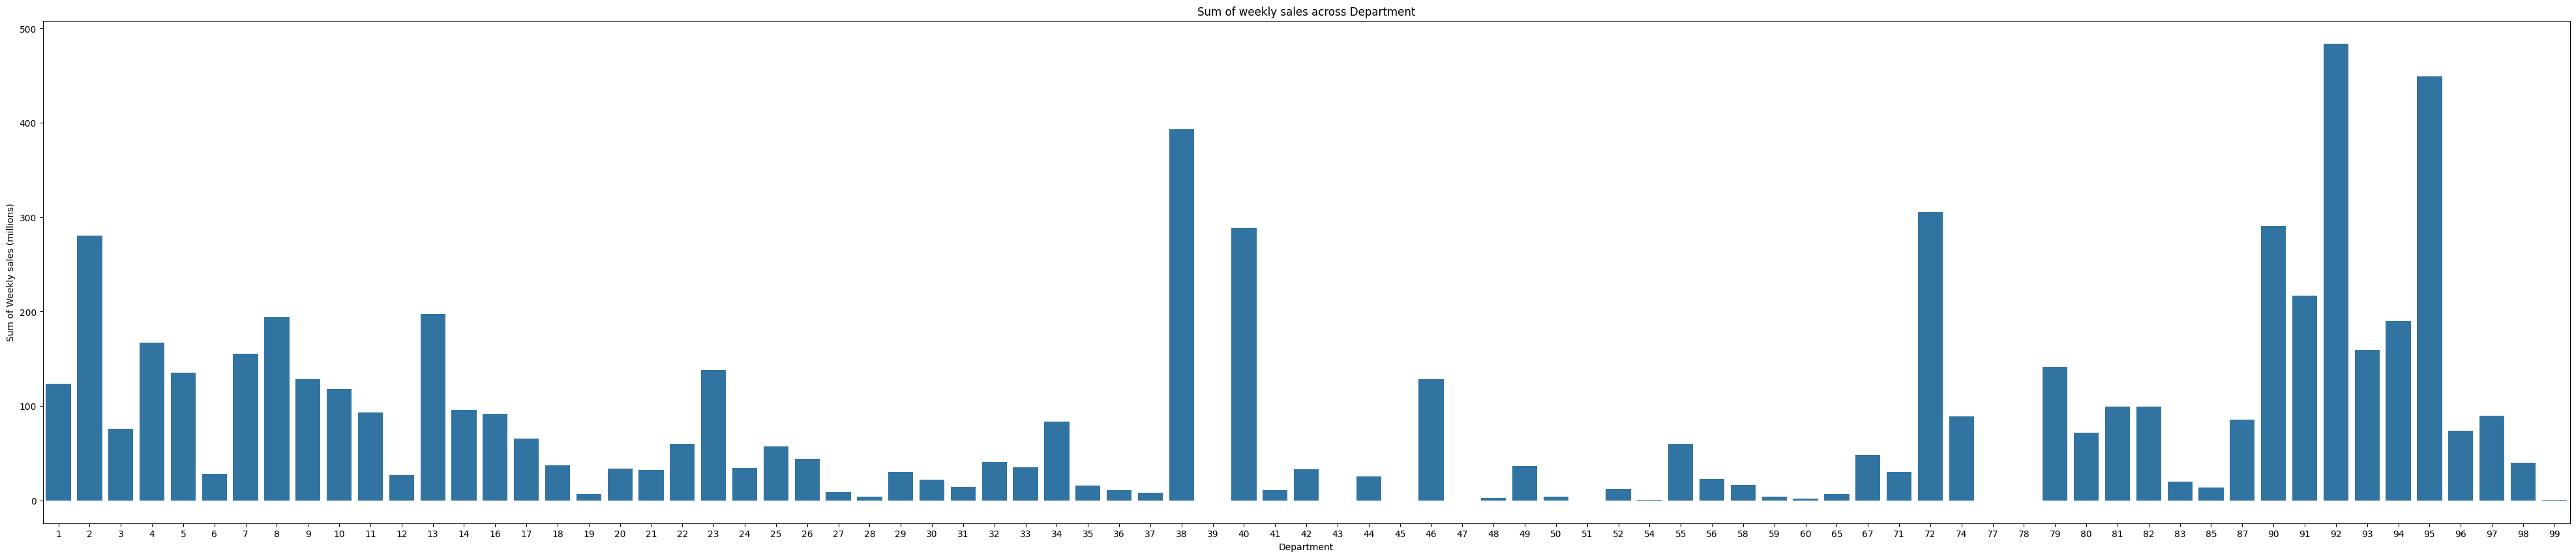

In [38]:
# Which departments are the highest earner?

department_sales=sales_store_feature_df.groupby(by= ['Dept'], as_index=False)['Weekly_Sales'].sum()
department_sales['Weekly_Sales']=department_sales['Weekly_Sales']/1000000
mplt.figure(figsize=(50, 10))
sns.barplot(x=department_sales.Dept, y=department_sales.Weekly_Sales)
mplt.title("Sum of weekly sales across Department")
mplt.xlabel("Department")
mplt.ylabel("Sum of Weekly sales (millions)")

In [38]:
# Trend of markdown across time
# Graphical insights on markdown

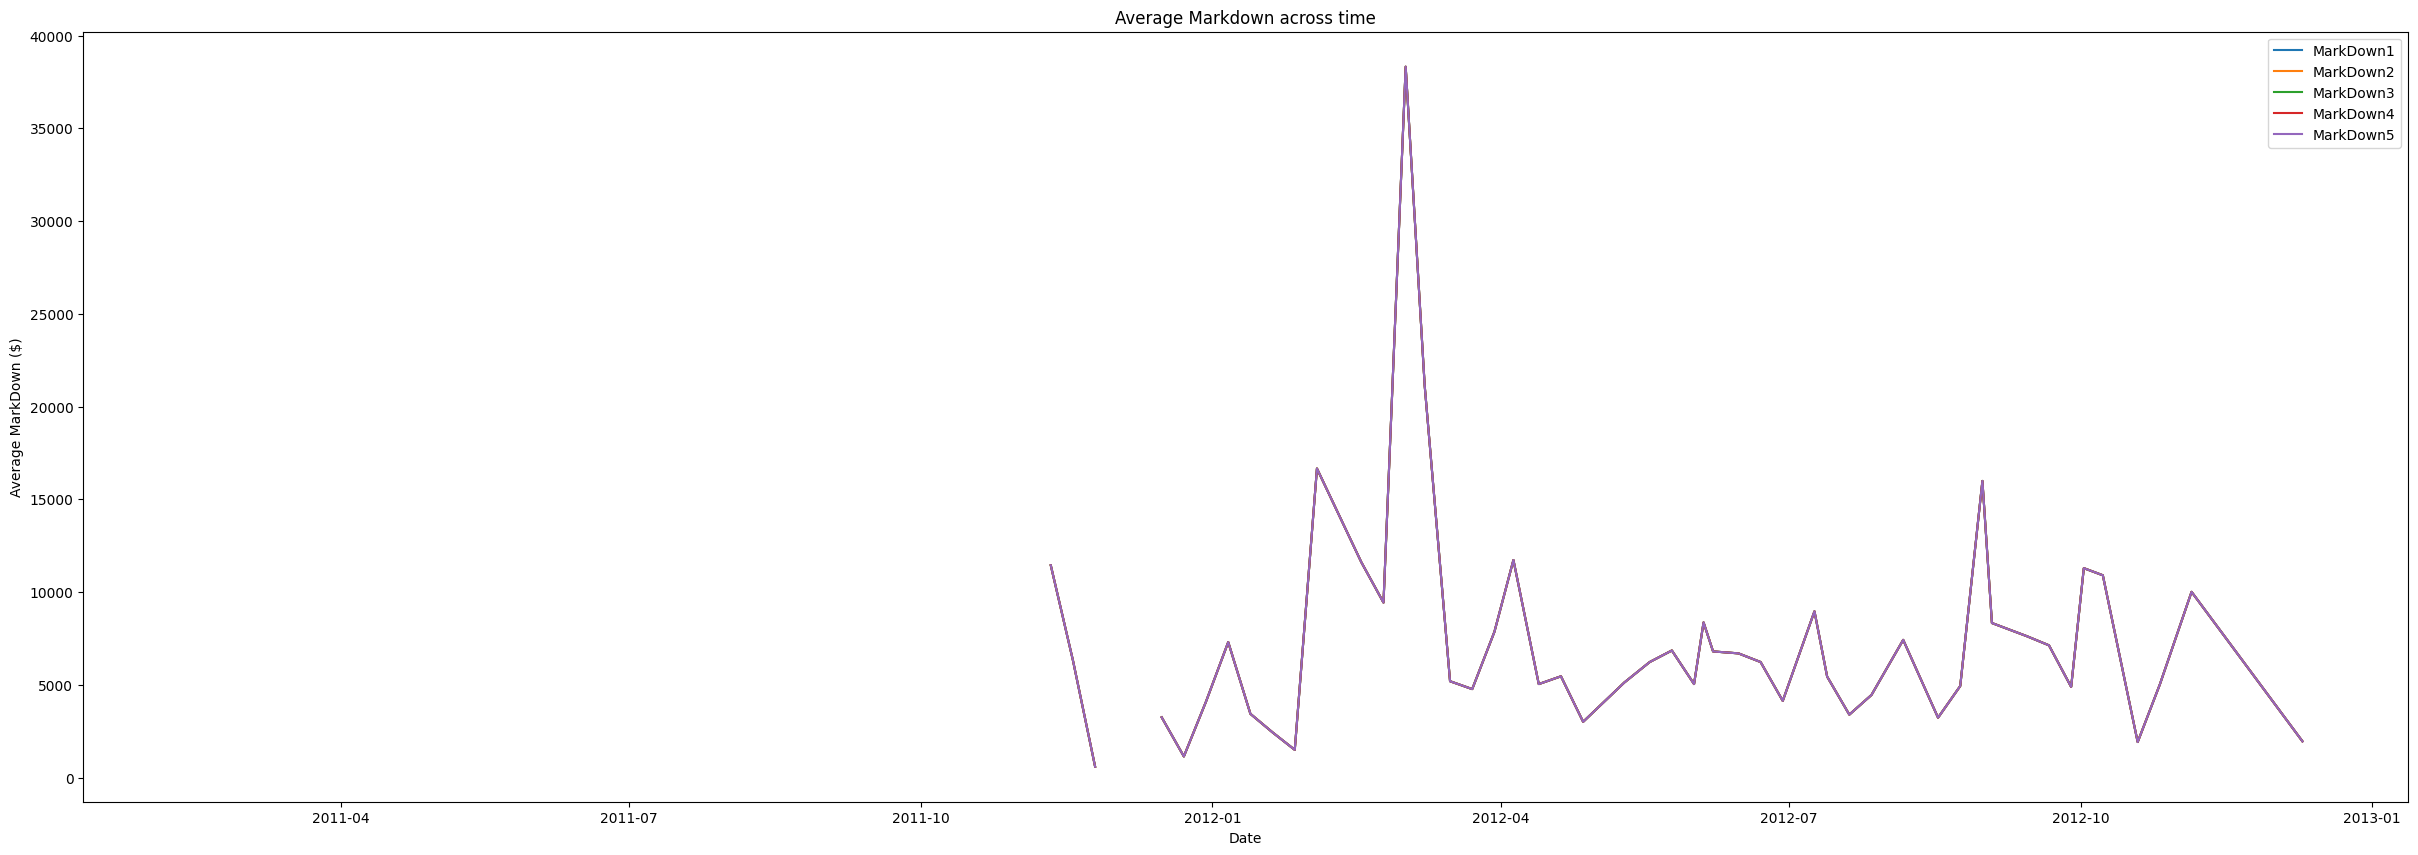

In [43]:
# Average Markdown across time

markdown_across_time= sales_store_feature_df.groupby('Date').agg({'MarkDown1' : 'mean', 'MarkDown2' : 'mean', 'MarkDown3' : 'mean', 'MarkDown4' : 'mean', 'MarkDown5' : 'mean',})
mplt.figure(figsize=(30,10))

mplt.plot(markdown_across_time.index, markdown_across_time.MarkDown1, label = 'MarkDown1')
mplt.plot(markdown_across_time.index, markdown_across_time.MarkDown1, label = 'MarkDown2')
mplt.plot(markdown_across_time.index, markdown_across_time.MarkDown1, label = 'MarkDown3')
mplt.plot(markdown_across_time.index, markdown_across_time.MarkDown1, label = 'MarkDown4')
mplt.plot(markdown_across_time.index, markdown_across_time.MarkDown1, label = 'MarkDown5')

mplt.title("Average Markdown across time")
mplt.xlabel("Date")
mplt.ylabel("Average MarkDown ($)")
mplt.legend(loc = 'best')

Text(0.5, 1.0, 'markdown across month')

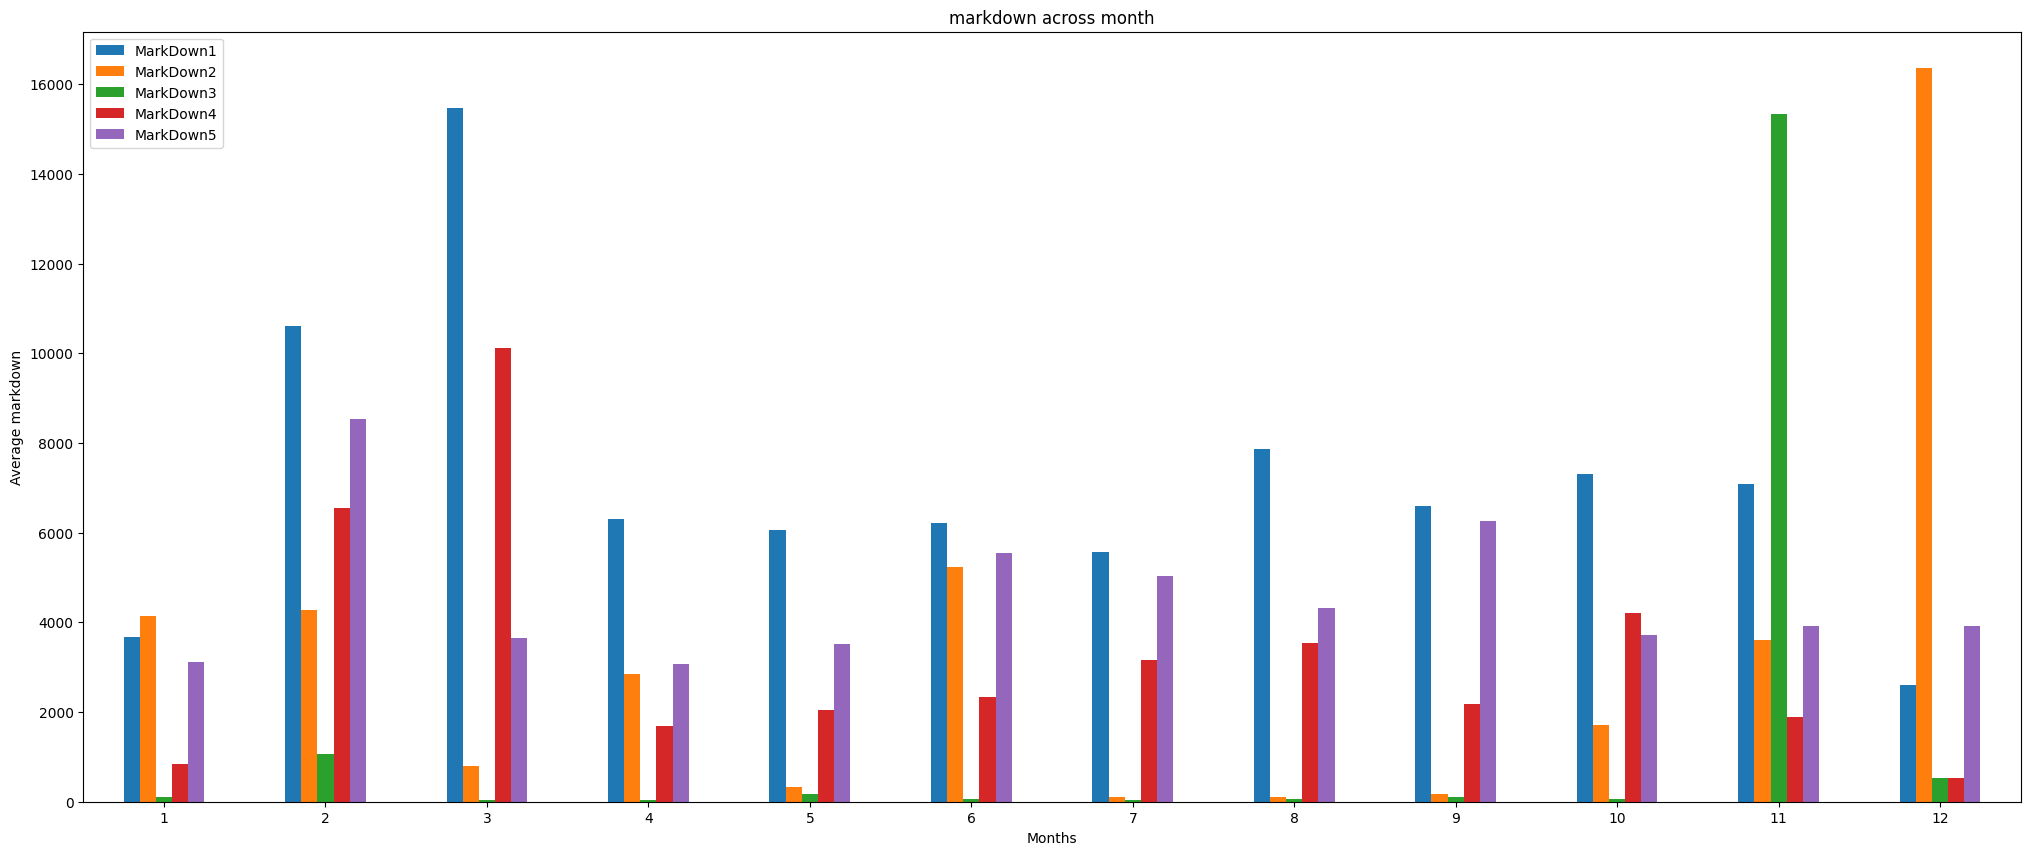

In [47]:
# markdown_across_month

markdown_across_month= sales_store_feature_df.groupby(sales_store_feature_df.Date.dt.month).agg({'MarkDown1' : 'mean', 'MarkDown2' : 'mean', 'MarkDown3' : 'mean', 'MarkDown4' : 'mean', 'MarkDown5' : 'mean',})
markdown_across_month.head()
markdown_across_month.plot(kind='bar', figsize=(25,10), rot=0)
mplt.xlabel("Months")
mplt.ylabel("Average markdown")
mplt.title("markdown across month")

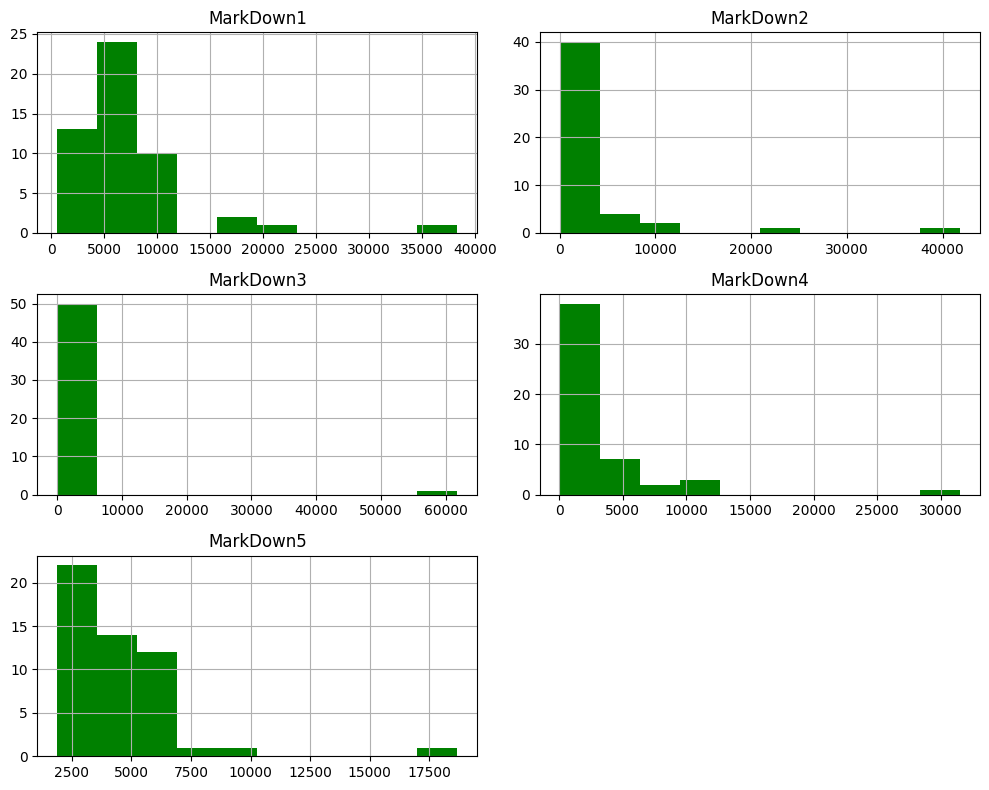

In [51]:
# Frequency of markdown

markdown_across_time.hist(bins=10, figsize=(10,8), color='Green')
mplt.tight_layout()
mplt.show()

Text(0.5, 1.0, 'markdown across Type')

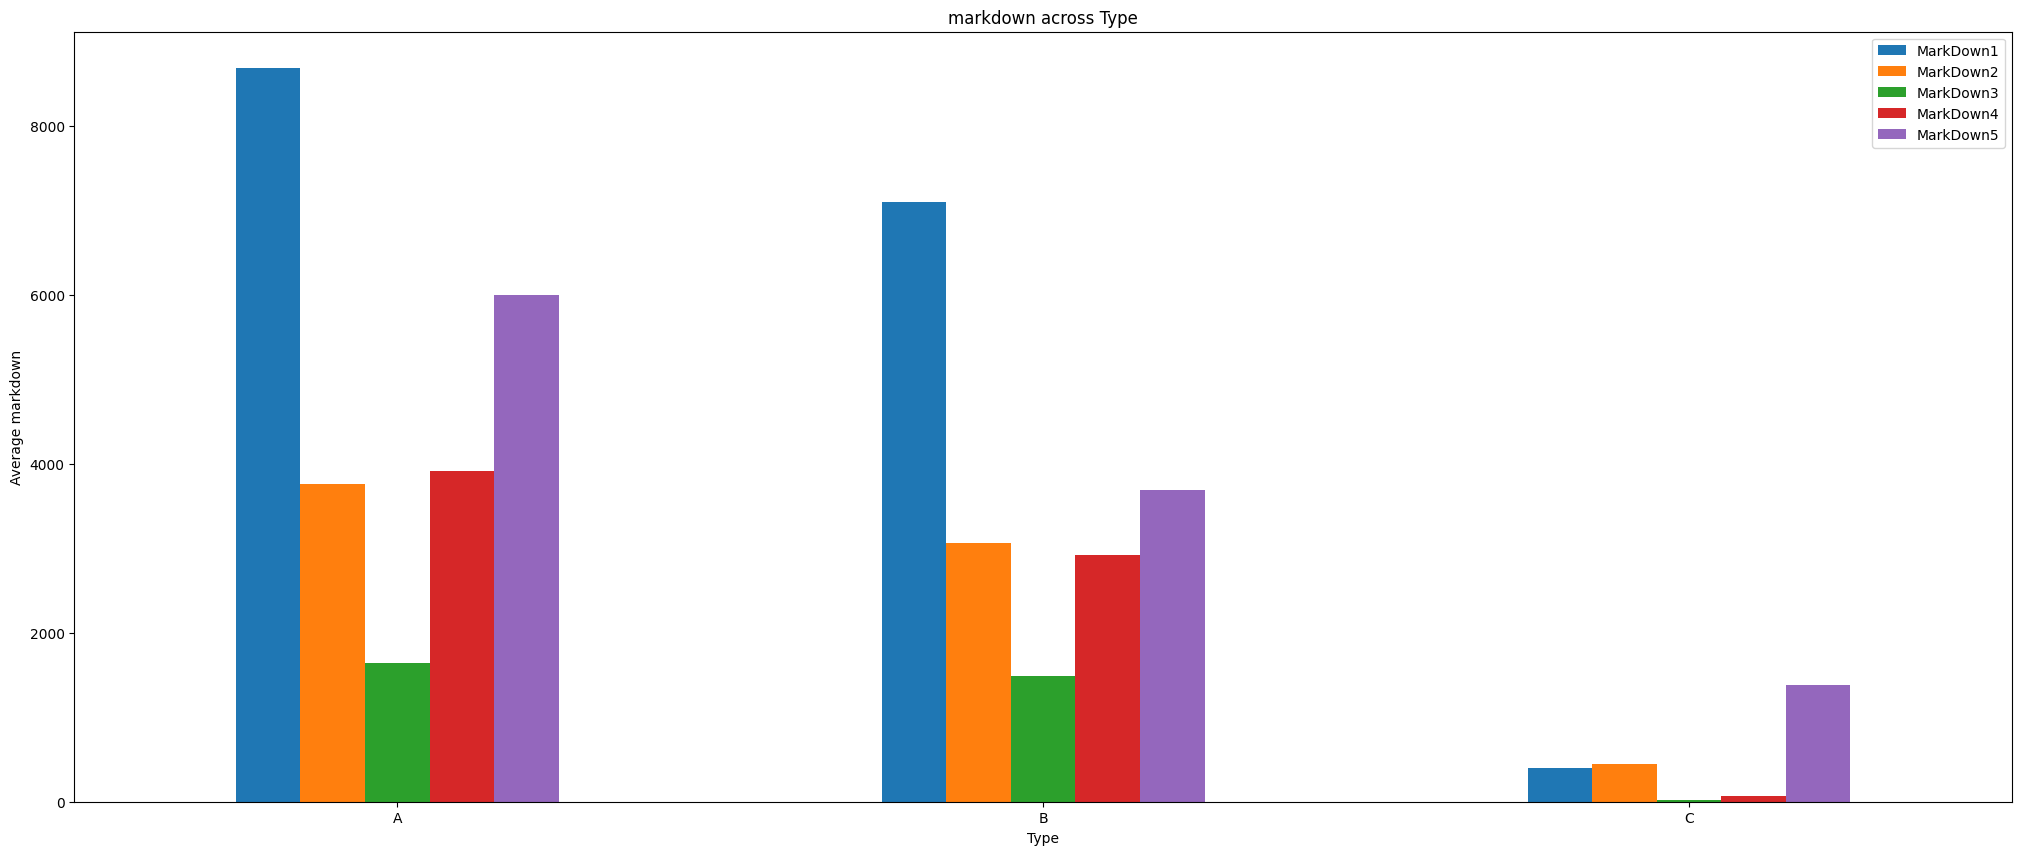

In [53]:
# markdown across Type

markdown_across_type= sales_store_feature_df.groupby(sales_store_feature_df.Type).agg({'MarkDown1' : 'mean', 'MarkDown2' : 'mean', 'MarkDown3' : 'mean', 'MarkDown4' : 'mean', 'MarkDown5' : 'mean',})
markdown_across_type.head()
markdown_across_type.plot(kind='bar', figsize=(25,10), rot=0)
mplt.xlabel("Type")
mplt.ylabel("Average markdown")
mplt.title("markdown across Type")

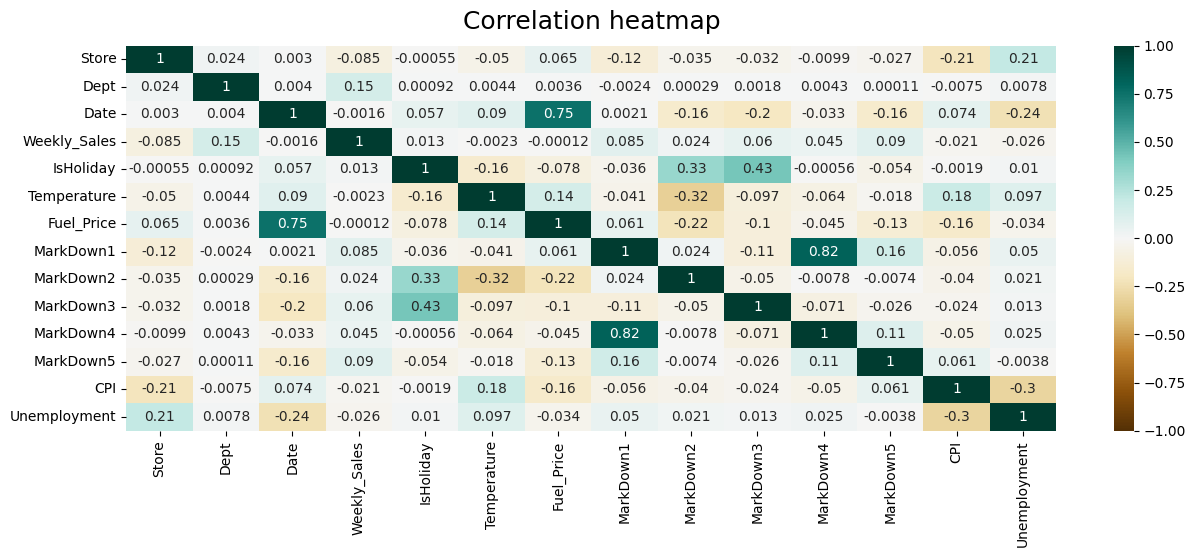

In [56]:
# Correlation of factors and weekly sales

mplt.figure(figsize=(15,5))
sales_store_feature_df=pd.DataFrame(sales_store_feature_df)
sales_store_feature_df=sales_feature_df.astype(float, errors='ignore')
heatmap=sns.heatmap(sales_store_feature_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation heatmap', fontdict = {'fontsize':18}, pad=12);

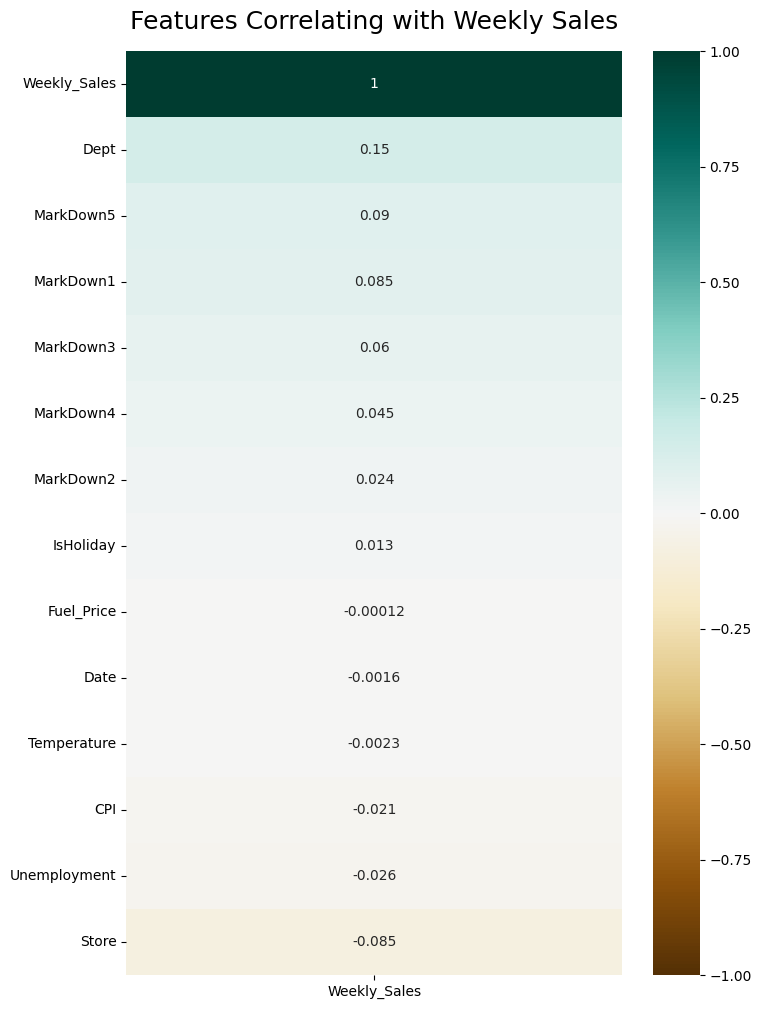

In [63]:
# correlation of independent variables with the dependent variables (Weekly_Sales)

mplt.figure(figsize=(8,12))
heatmap=sns.heatmap(sales_store_feature_df.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Weekly Sales', fontdict={'fontsize':18}, pad =16);